EE 240 HW2 Alexander Hartley, SID:862463985

# Installs

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# **H 2.1**

## **H 2.1 (a)**

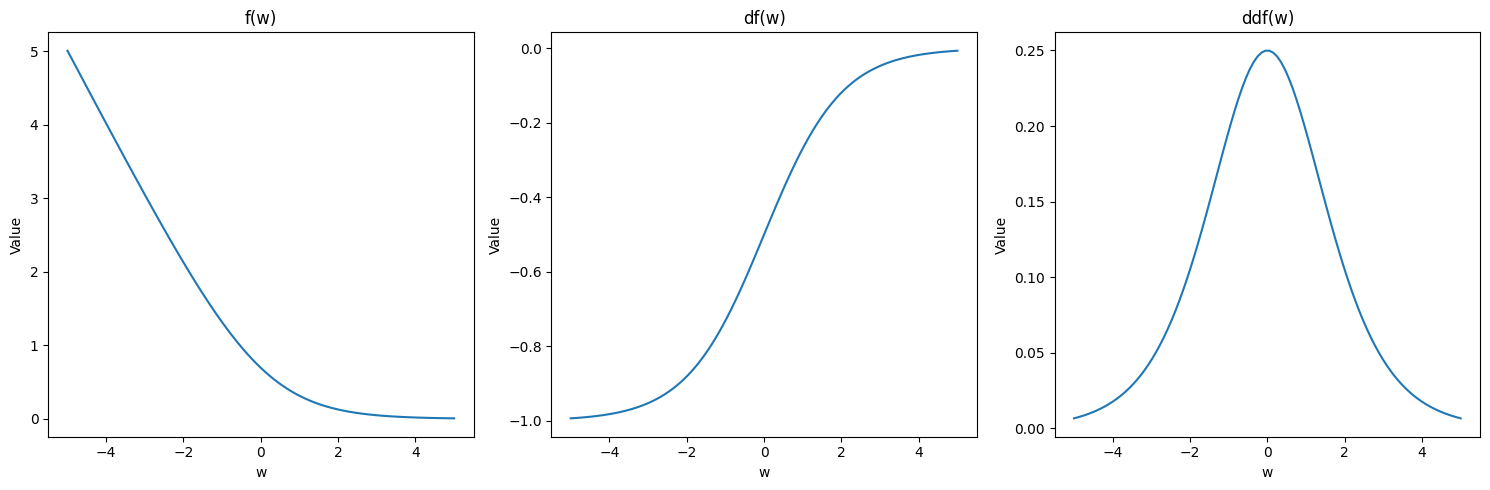

In [149]:
# asumed x is 1
def f(w):
    return np.log(1 + np.exp(-w))

def df(w):
    return (-1 * (np.exp(-w)))/(1 + np.exp(-w))

def ddf(w):
    return (np.exp(-w))/(1 + np.exp(-w))**2

w = np.linspace(-5, 5, 100)

fw = f(w)
dfw = df(w)
ddfw = ddf(w)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# f(w)
axs[0].plot(w, fw, label='f(w)')
axs[0].set_xlabel('w')
axs[0].set_ylabel('Value')
axs[0].set_title('f(w)')

# df(w)
axs[1].plot(w, dfw, label='df(w)')
axs[1].set_xlabel('w')
axs[1].set_ylabel('Value')
axs[1].set_title('df(w)')

# ddf(w)
axs[2].plot(w, ddfw, label='ddf(w)')
axs[2].set_xlabel('w')
axs[2].set_ylabel('Value')
axs[2].set_title('ddf(w)')

plt.tight_layout()
plt.show()

The second derivative of $f(w) = \log (1+\exp(-wx))$ shows that the function is convex and the second derivative of w never touches 0.

## **H 2.1 (b)**

In [150]:
mnist = fetch_openml('mnist_784')
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser='auto')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [151]:
train_X = X[0:60000,:]
train_y = y[0:60000]
test_X = X[60000:70000,:]
test_y = y[60000:70000]

class_0 = '3'
class_1 = '1'

X0 = train_X[train_y==class_0,:]
X1 = train_X[train_y==class_1,:]
y0 = np.zeros(X0.shape[0],int)
y1 = np.ones(X1.shape[0],int)

train_X = np.concatenate((X0,X1),axis=0)
train_y = np.concatenate((y0,y1),axis=0)
print('Number of training samples is {0} with {1} labels 0 and {2} labels 1'
.format(train_X.shape[0],y0.shape[0],y1.shape[0]))

X0 = test_X[test_y==class_0,:]
X1 = test_X[test_y==class_1,:]
y0 = np.zeros(X0.shape[0],int)
y1 = np.ones(X1.shape[0],int)

test_X = np.concatenate((X0,X1),axis=0)
test_y = np.concatenate((y0,y1),axis=0)
print('Number of test samples is {0} with {1} labels 0 and {2} labels 1'
.format(test_X.shape[0],y0.shape[0],y1.shape[0]))

train_X = np.insert(train_X,0,1,axis = 1)
test_X = np.insert(test_X,0,1,axis = 1)

Number of training samples is 12873 with 6131 labels 0 and 6742 labels 1
Number of test samples is 2145 with 1010 labels 0 and 1135 labels 1


In [152]:
class LogisticRegression:
    def __init__(self, a=0.001, max_iter=10000, tol=1e-12):
        self.a = a # learning rate
        self.max_iter = max_iter # max iterations for stopping criteria
        self.tol = tol # tolerance for stopping criteria
        self.w = None
        self.b = None

    def fit(self, X, y):
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0
        old_J = float('inf')
        for i in range(self.max_iter):
            y_pred = self.predict(X)
            self.gradient_descent(X, y, y_pred)

            # check stopping criteria
            J = self.compute_cost(y_pred, y)
            if old_J - J < self.tol:
                break
            old_J = J

    # sigmoid function
    def predict(self, X):
        z = X.dot(self.w) + self.b
        z = np.clip(z, -200, 200) # prevent overflow
        return 1 / (1 + np.exp(-z))

    def gradient_descent(self, X, y_pred, y):
        n = len(y)
        dw = -(1 / n) * np.dot(X.T, (y-y_pred))
        db = -(1 / n) * np.sum(y - y_pred)

        # learning step
        self.w -= self.a * dw
        self.b -= self.a * db

    # cross-entropy loss
    def compute_cost(self, y_pred, y_train):
        n = len(y_train)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        j = -1/n * np.sum(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
        return j

In [153]:
sigmoid_vec = np.vectorize(lambda z: 1 / (1 + np.exp(-z))) # same as LogisticRegression.predict
LR_model = LogisticRegression(a=0.0001, max_iter=100000, tol=1e-12)
LR_model.fit(train_X, train_y)
predictions = np.round(sigmoid_vec(np.matmul(test_X.astype(float), LR_model.w + LR_model.b)))
acc = 100.0 * np.sum(test_y == predictions) / test_y.shape[0]
print(acc)

7.972027972027972


In [154]:
print(predictions)

[1. 1. 1. ... 0. 0. 0.]


# **H 2.2**

## **H 2.2 (a)**

In [155]:
X = []
y = []
w_original = np.random.randint(-100, 100, 2) # 2 random weights between -100 and 100
b_original = np.random.randint(-500, 500, 1) # random bias between -500 and 500

# generate 100 random points
for _ in range(100):
    x = np.random.uniform(low=-1000, high=1000, size=2) # random x between -1000 and 1000
    label = np.sign(np.dot(x, w_original) + b_original) # label based on original weights and bias
    X.append(x)
    y.append(label)
    
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [156]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.7, random_state=19)

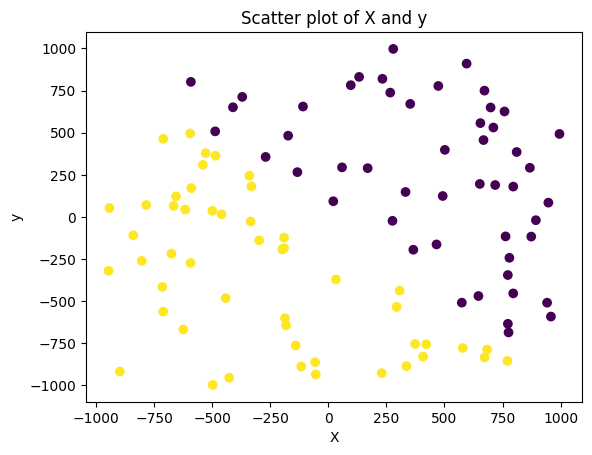

In [157]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of X and y')
plt.show()

## **H 2.2 (b)**

In [158]:
class Perceptron:
    def __init__(self, max_iter=10000):
        self.max_iter = max_iter # max iterations for stopping criteria
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n, m = X.shape
        self.w = np.zeros(m)
        self.b = 0

        for iter in range(self.max_iter):
            converged = True
            for i in range(n):
                # update weights and bias if misclassified
                if y[i] != np.sign(np.dot(X[i], self.w) + self.b):
                    self.w += 0.5 * (y[i] - np.sign(np.dot(X[i], self.w) + self.b)) * X[i] # learning rate = 0.5
                    self.b += 0.5 * (y[i] - np.sign(np.dot(X[i], self.w) + self.b))
                    converged = False
            if converged:
                print('Converged after {0} iterations'.format(iter + 1))
                break
        else:
            print('Did not converge after {0} iterations'.format(self.max_iter))
            
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)    

## **H 2.2 (c)**

In [159]:
PLA = Perceptron(max_iter=1000)
PLA.fit(X_train_1, y_train_1)
data1_w, data1_b = PLA.w, PLA.b # weights and bias for data1

PLA.fit(X_train_2, y_train_2)
data2_w, data2_b = PLA.w, PLA.b # weights and bias for data2

Converged after 2 iterations
Converged after 2 iterations


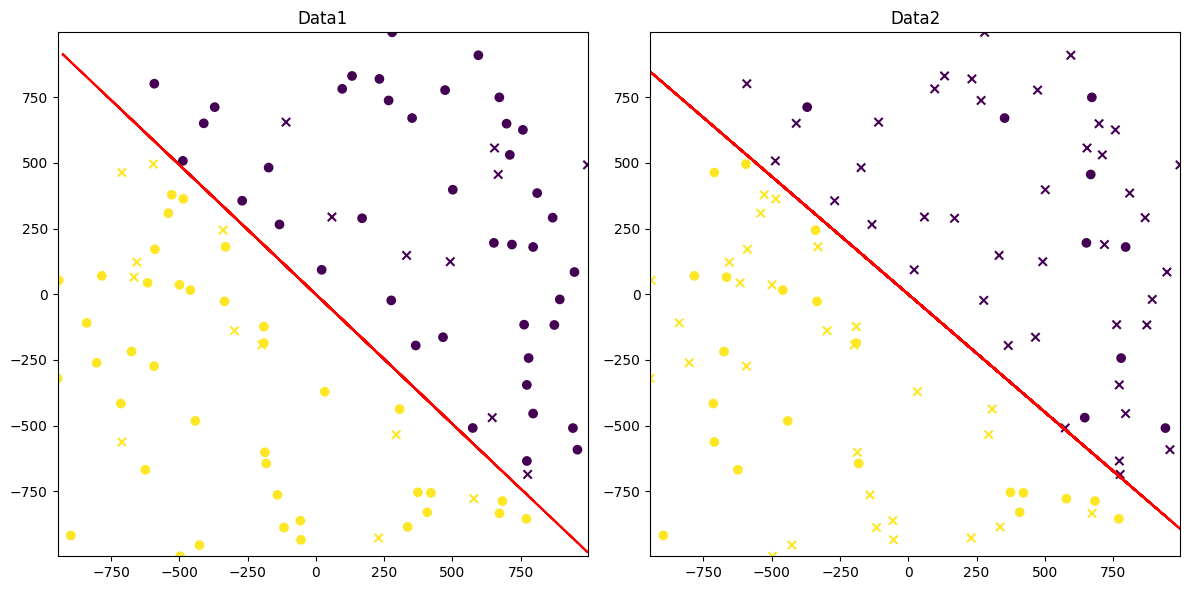

In [160]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_xlim(min(X[:, 0]), max(X[:, 0]))
axs[0].set_ylim(min(X[:, 1]), max(X[:, 1]))
axs[1].set_xlim(min(X[:, 0]), max(X[:, 0]))
axs[1].set_ylim(min(X[:, 1]), max(X[:, 1]))

# data1
axs[0].scatter(X_train_1[:, 0], X_train_1[:, 1], c=y_train_1)
axs[0].scatter(X_test_1[:, 0], X_test_1[:, 1], c=y_test_1, marker='x')
axs[0].plot(X_test_1, (-data1_w[0] * X_test_1 - data1_b) / data1_w[1], c='red')
axs[0].set_title('Data1')

# data2
axs[1].scatter(X_train_2[:, 0], X_train_2[:, 1], c=y_train_2)
axs[1].scatter(X_test_2[:, 0], X_test_2[:, 1], c=y_test_2, marker='x')
axs[1].plot(X_test_2, (-data2_w[0] * X_test_2 - data2_b) / data2_w[1], c='red')
axs[1].set_title('Data2')

plt.tight_layout()
plt.show()


## **H 2.2 (d)**

In [161]:
def compute_metrics(w, b, X_test, y_test):
    tp, fp, tn, fn = 0, 0, 0, 0 # true positive, false positive, true negative, false negative
    for i in range(len(y_test)):
        y_pred = np.sign(np.dot(X_test[i], w) + b)
        if y_test[i] == 1 and y_pred == 1:
            tp += 1
        elif y_test[i] == -1 and y_pred == 1:
            fp += 1
        elif y_test[i] == -1 and y_pred == -1:
            tn += 1
        elif y_test[i] == 1 and y_pred == -1:
            fn += 1
    accuracy, precision, recall, f1 = (tp + tn) / len(y_test), tp / (tp + fp), tp / (tp + fn), 2 * tp / (2 * tp + fp + fn)
    return accuracy, precision, recall, f1, tp, fp, tn, fn

In [162]:
data1_metrics = compute_metrics(data1_w, data1_b, X_test_1, y_test_1)
data2_metrics = compute_metrics(data2_w, data2_b, X_test_2, y_test_2)
print('Data1: tp={0}, fp={1}, tn={2}, fn={3}'.format(data1_metrics[4], data1_metrics[5], data1_metrics[6], data1_metrics[7]))
print('Data1: accuracy={0}, precision={1}, recall={2}, f1={3}'.format(data1_metrics[0], data1_metrics[1], data1_metrics[2], data1_metrics[3]))
print('------------------------------------------------------')
print('Data2: tp={0}, fp={1}, tn={2}, fn={3}'.format(data2_metrics[4], data2_metrics[5], data2_metrics[6], data2_metrics[7]))
print('Data2: accuracy={0}, precision={1}, recall={2}, f1={3}'.format(data2_metrics[0], data2_metrics[1], data2_metrics[2], data2_metrics[3]))

Data1: tp=11, fp=0, tn=9, fn=0
Data1: accuracy=1.0, precision=1.0, recall=1.0, f1=1.0
------------------------------------------------------
Data2: tp=29, fp=0, tn=41, fn=0
Data2: accuracy=1.0, precision=1.0, recall=1.0, f1=1.0


## **H 2.2 (e)**

In [163]:
class KPerceptron:
    def __init__(self, max_iter=10000):
        self.alpha = None
        self.X = None
        self.y = None
        self.b = 0
        self.w = None
        self.max_iter = max_iter
        
    def fit(self, X, y):
        n, m = X.shape
        self.alpha = np.zeros(n)
        self.X = X
        self.y = y
        self.b = 0

        for iter in range(self.max_iter):
            for i in range(n):
                # estimate y based on current alpha and b
                y_estimated = np.sign(np.sum([self.alpha[j] * self.y[j] * self.linear_kernel(self.X[j], self.X[i]) for j in range(n)]) + self.b)
                if y_estimated != y[i]: # misclassified
                    self.alpha[i] += 1 # update alpha
                    self.b += y[i] 

    def linear_kernel(self, x1, x2):
        return np.dot(x1, x2) 
    
    # decision boundary function
    def compute_boundary(self):
        self.w = np.sum([self.alpha[i] * self.y[i] * self.X[i] for i in range(len(self.alpha))], axis=0)

In [164]:
KPLA = KPerceptron(max_iter=1000)
KPLA.fit(X_train_1, y_train_1)
KPLA.compute_boundary()

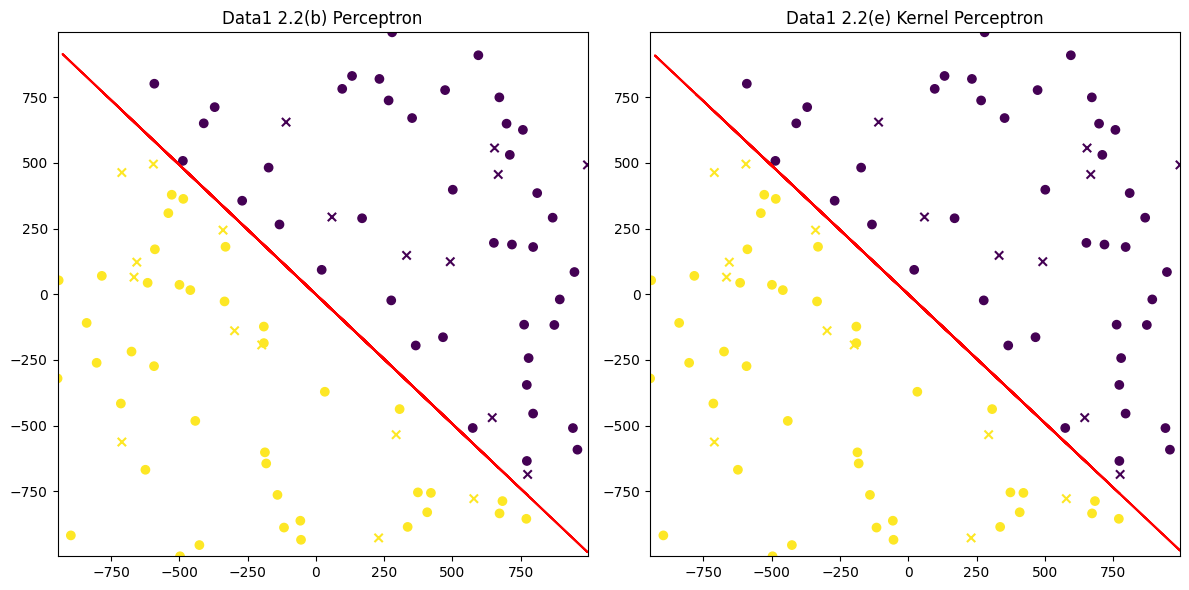

In [165]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_xlim(min(X[:, 0]), max(X[:, 0]))
axs[0].set_ylim(min(X[:, 1]), max(X[:, 1]))
axs[1].set_xlim(min(X[:, 0]), max(X[:, 0]))
axs[1].set_ylim(min(X[:, 1]), max(X[:, 1]))

# PLA
axs[0].scatter(X_train_1[:, 0], X_train_1[:, 1], c=y_train_1)
axs[0].scatter(X_test_1[:, 0], X_test_1[:, 1], c=y_test_1, marker='x')
axs[0].plot(X_test_1, (-data1_w[0] * X_test_1 - data1_b) / data1_w[1], c='red')
axs[0].set_title('Data1 2.2(b) Perceptron')

# KPLA
y_pred = -KPLA.w[0] / KPLA.w[1] * X_test_1 - KPLA.b / KPLA.w[1]
axs[1].scatter(X_train_1[:, 0], X_train_1[:, 1], c=y_train_1)
axs[1].scatter(X_test_1[:, 0], X_test_1[:, 1], c=y_test_1, marker='x')
axs[1].plot(X_test_1, y_pred, c='red')
axs[1].set_title('Data1 2.2(e) Kernel Perceptron')

plt.tight_layout()
plt.show()

Decision boundary may not be completely identical as the learning rate and convergence criteria is slightly different.

# **H 2.3**

In [166]:
X = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y = [1, -1, -1, 1]

## **H 2.3 (a)**

Show that the features vectors are linearly separable in the 5D space.

## **H 2.3 (b)**